# **Hypothesis: Linear Regression**

In [38]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
import pandas_datareader.data as web
import datetime

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Define which online source to use
data_source = 'yahoo'

# define start and end dates
start_date = '2018-01-01'
end_date = '2019-12-31'
symbol = 'ICICIBANK.NS'
#symbol = 'GAIL.NS'
#symbol = 'ONGC.NS'
# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
web.DataReader(symbol, data_source, start_date, end_date).to_csv(symbol+'.csv')
df = pd.read_csv(symbol+'.csv')
df = pd.DataFrame(df,columns=['Date','Open','High','Low','Close']).round(decimals=2)
df.head()


,Date,Open,High,Low,Close
0,2018-01-01,314.00,314.00,309.1,310.3
1,2018-01-02,310.95,311.70,307.5,309.7
2,2018-01-03,312.50,316.35,312.5,315.0
3,2018-01-04,314.95,315.65,311.5,314.7
4,2018-01-05,314.45,315.15,311.6,312.9


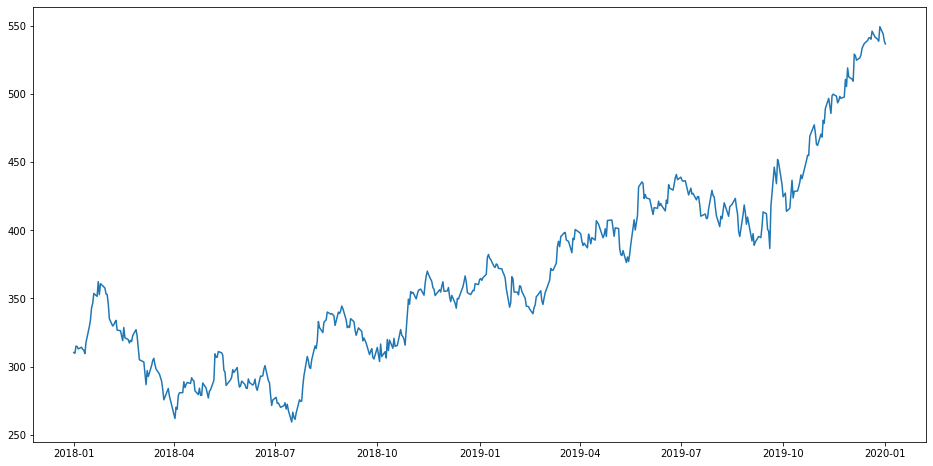

In [39]:
#creating a separate dataset
disdata = pd.DataFrame(df,columns=['Date','Open','High','Low','Close'])

#setting index as date
disdata['Date'] = pd.to_datetime(disdata.Date,format='%Y-%m-%d')
disdata.index = disdata['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(disdata['Close'], label='Close Price history')

In [40]:
#creating a separate dataset
data = pd.DataFrame(df,columns=['Date','Open','High','Low','Close'])

In [41]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.30,shuffle=False)
from sklearn.linear_model import LinearRegression

x_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
from sklearn import metrics

x_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

x_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

preds_train = model.predict(x_train)
print('\nError Report on TRAIN Data')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, preds_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, preds_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, preds_train)))

preds_test = model.predict(x_test)
print('\nError Report on TEST Data')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds_test)))


Error Report on TRAIN Data
Mean Absolute Error: 20.455983008964143
Mean Squared Error: 654.8240434001661
Root Mean Squared Error: 25.589529956608544

Error Report on TEST Data
Mean Absolute Error: 45.60707463561199
Mean Squared Error: 3289.0336249304955
Root Mean Squared Error: 57.350096991465456


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

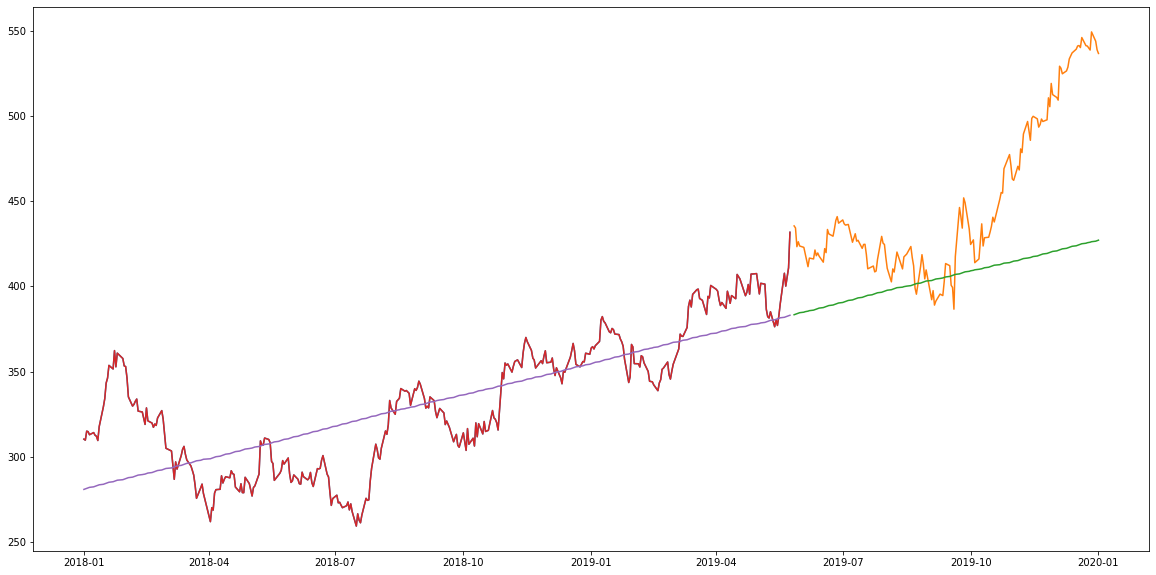

In [43]:
#setting index as date
test['Date'] = pd.to_datetime(test.Date,format='%Y-%m-%d')
test.index = test['Date']

train['Date'] = pd.to_datetime(train.Date,format='%Y-%m-%d')
train.index = train['Date']

train['Predictions_train'] = 0
train['Predictions_train'] = preds_train

test['Predictions_test'] = 0
test['Predictions_test'] = preds_test

plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions_test']])
plt.plot(train[['Close', 'Predictions_train']])

RMSE = 25.5895 on TRAIN DATA
RMSE = 57.3500 on TEST DATA

RMSE = 8.4087 on TRAIN DATA
RMSE = 41.047 on TEST DATA

RMSE = 11.0870 on TRAIN DATA
RMSE = 46.6549 on TEST DATA
